# Graphs and Linear Algebra

Recall that the adjacency matrix of an undirected graph has $A_{i,j} = 1$ if and only if nodes $i$ and $j$ are adjacent. Also, recall that a graph is **regular** with degree $k$ if every node has $k$ neighbors. We also say that the graph is $k$-regular. Finally, for shorthand, we say that the eigenvalues of a graph are the eigenvalues of its adjacency matrix.

**a)** Find three graphs with more than five nodes that are 2-regular, 3-regular, and 4-regular. Represent these in `networkx`, draw them, and find their adjacency matrices. These will be running examples for this problem.

**b)** Find the eigenvalues of the three examples, along with the multiplicities of the eigenvalues.

**c)** Show that if $G$ is $k$-regular, then $k$ is an eigenvalue of $G$. 

**d)** Show that $G$ is $k$-regular and connected, then the eigenvalue $k$ of $G$ has multiplicity one. 

**e)** Show that $G$ is $k$-regular then $|\lambda|\leq k$ for any eigenvalue $\lambda$ of $G$. 

**f)** Let $J$ be the matrix of all ones and $A$ be the adjacency matrix of a $k$-regular graph. Show that $AJ = JA=kJ$. 

**g)** Show by construction that there exists regular graph with least eigenvalue equal to $-2$. 

**h)** Show that the following graph, called the Petersen Graph, is $3$-regular by finding its eigenvalues. 

<img src="https://www.researchgate.net/profile/Paul_Wenger/publication/45714891/figure/fig1/AS:669480808091681@1536628071715/The-Petersen-graph.png" width=20%>

**i)** Show that if both $n \geq k+1$ and $nk$ is even, then there exists a $k$-regular graph of size $n$. 

In [ ]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

**a)** Find three graphs with more than five nodes that are 2-regular, 3-regular, and 4-regular. Represent these in networkx, draw them, and find their adjacency matrices. These will be running examples for this problem.

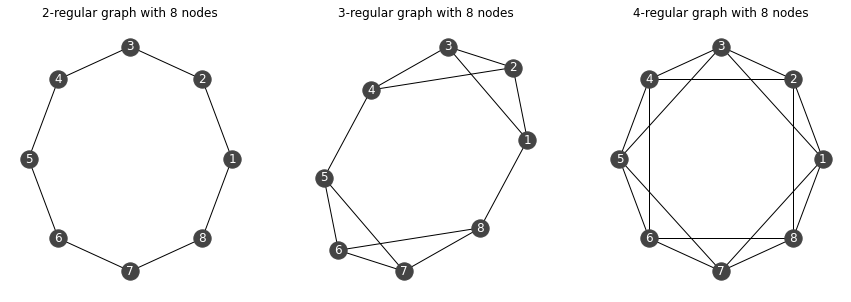

In [ ]:
#Ans.a) Representing three graphs with more than five nodes 
#that are 2-regular, 3-regular, and 4-regular and drawing them.

#Graph 1 parameters
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,1)])

#Graph 2 parameters
H = nx.Graph()
H.add_nodes_from([1,2,3,4,5,6,7,8])
H.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),
                  (7,8),(8,1),(1,3),(2,4),(5,7),(6,8)])

#Graph 3 parameters
I = nx.Graph()
I.add_nodes_from([1,2,3,4,5,6,7,8])
I.add_edges_from([(1,2),(1,3),(1,7),(1,8),(2,3),(2,4),(2,8),(3,4),
                  (3,5),(4,5),(4,6),(5,6),(5,7),(6,7),(6,8),(7,8)])

#Plotting parameters
basic_graph,ax = plt.subplots(1,3, figsize= (15,5))

nx.draw(G,
        ax=ax[0], 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        )
ax[0].set_title('2-regular graph with 8 nodes');

nx.draw(H,
        ax=ax[1], 
        pos=nx.kamada_kawai_layout(H),
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        )
ax[1].set_title('3-regular graph with 8 nodes');

nx.draw(I,
        ax=ax[2], 
        pos=nx.kamada_kawai_layout(I),
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        )
ax[2].set_title('4-regular graph with 8 nodes');

**Ans.a) To find the adjacency matrix of the graphs drawn:**

Adjacency matrix for the 2-regular graph with 8 nodes:
$$
A_2 = \begin{pmatrix}
0 & 1 & 0 & 0 & 0 & 0 & 0 & 1\\
1 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 1\\
1 & 0 & 0 & 0 & 0 & 0 & 1 & 0
\end{pmatrix}
$$

Adjacency matrix for the 3-regular graph with 8 nodes:
$$
A_3 = \begin{pmatrix}
0 & 1 & 1 & 0 & 0 & 0 & 0 & 1\\
1 & 0 & 1 & 1 & 0 & 0 & 0 & 0\\
1 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 1 & 1 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 1 & 1 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 1 & 1\\
0 & 0 & 0 & 0 & 1 & 1 & 0 & 1\\
1 & 0 & 0 & 0 & 0 & 1 & 1 & 0
\end{pmatrix}
$$

Adjacency matrix for the 4-regular graph with 8 nodes:
$$
A_4 = \begin{pmatrix}
0 & 1 & 1 & 0 & 0 & 0 & 1 & 1\\
1 & 0 & 1 & 1 & 0 & 0 & 0 & 1\\
1 & 1 & 0 & 1 & 1 & 0 & 0 & 0\\
0 & 1 & 1 & 0 & 1 & 1 & 0 & 0\\
0 & 0 & 1 & 1 & 0 & 1 & 1 & 0\\
0 & 0 & 0 & 1 & 1 & 0 & 1 & 1\\
1 & 0 & 0 & 0 & 1 & 1 & 0 & 1\\
1 & 1 & 0 & 0 & 0 & 1 & 1 & 0
\end{pmatrix}
$$



**b)** Find the eigenvalues of the three examples, along with the multiplicities of the eigenvalues

In [ ]:
#Ans.b) Eigenvalues of the 3 example graphs:
#Representing the adjacent matrix 
A_2 = np.matrix([[0 , 1 , 0 , 0 , 0 , 0 , 0 , 1],
               [1 , 0 , 1 , 0 , 0 , 0 , 0 , 0],
               [0 , 1 , 0 , 1 , 0 , 0 , 0 , 0],
               [0 , 0 , 1 , 0 , 1 , 0 , 0 , 0],
               [0 , 0 , 0 , 1 , 0 , 1 , 0 , 0],
               [0 , 0 , 0 , 0 , 1 , 0 , 1 , 0],
               [0 , 0 , 0 , 0 , 0 , 1 , 0 , 1],
               [1 , 0 , 0 , 0 , 0 , 0 , 1 , 0]])

A_3 = np.matrix([[0 , 1 , 1 , 0 , 0 , 0 , 0 , 1],
               [1 , 0 , 1 , 1 , 0 , 0 , 0 , 0],
               [1 , 1 , 0 , 1 , 0 , 0 , 0 , 0],
               [0 , 1 , 1 , 0 , 1 , 0 , 0 , 0],
               [0 , 0 , 0 , 1 , 0 , 1 , 1 , 0],
               [0 , 0 , 0 , 0 , 1 , 0 , 1 , 1],
               [0 , 0 , 0 , 0 , 1 , 1 , 0 , 1],
               [1 , 0 , 0 , 0 , 0 , 1 , 1 , 0]])

A_4 = np.matrix([[0 , 1 , 1 , 0 , 0 , 0 , 1 , 1],
               [1 , 0 , 1 , 1 , 0 , 0 , 0 , 1],
               [1 , 1 , 0 , 1 , 1 , 0 , 0 , 0],
               [0 , 1 , 1 , 0 , 1 , 1 , 0 , 0],
               [0 , 0 , 1 , 1 , 0 , 1 , 1 , 0],
               [0 , 0 , 0 , 1 , 1 , 0 , 1 , 1],
               [1 , 0 , 0 , 0 , 1 , 1 , 0 , 1],
               [1 , 1 , 0 , 0 , 0 , 1 , 1 , 0]])

def Sym(A):
  """
  To check if matrix A is symmetric,
  as to fulfill the property of Adjacency matrix
  """
  B = A.T #Defining a matrix which is transpose of matrix A
  if B.all()==A.all():    #Condition for checking symmetry
    print("Matrix is symmetric")

#To check if the three example matrix are symmetric
Sym(A_2)
Sym(A_3)
Sym(A_4)

#Eigenvalues calculation and rounding off
A2_eig = np.round(np.linalg.eigvals(A_2))
A3_eig = np.round(np.linalg.eigvals(A_3))
A4_eig = np.round(np.linalg.eigvals(A_4))

def Mul(A_eig):
    """
    To get the multiplicity of each eigenvalues in A_eig list
    """
    uni = np.unique(A_eig) #To get the unique eigenvalues
    lst = dict.fromkeys(uni, []) #Extract keys from the dictionary of unique eigenvalues
    for i in range(len(uni)):
        c = 0                     
        for j in range(len(A_eig)):
            if (A_eig[j] == uni[i]):
              c = c + 1
        lst[uni[i]] = c
    return lst

#Printing the results
print('\nEigenvalues of 2-regular graph:', A2_eig)
print('Multiplicity of eigenvalues of 2-regular graph:',Mul(A2_eig))
print('\nEigenvalues of matrix of 3-regular:', A3_eig)
print('Multiplicity of eigenvalues of 3-regular graph:',Mul(A3_eig))
print('\nEigenvalues of matrix of 4-regular:', A4_eig)
print('Multiplicity of eigenvalues of 4-regular graph:',Mul(A4_eig))

Matrix is symmetric
Matrix is symmetric
Matrix is symmetric

Eigenvalues of 2-regular graph: [-2. -1.  0.  2. -1. -0.  1.  1.]
Multiplicity of eigenvalues of 2-regular graph: {-2.0: 1, -1.0: 2, 0.0: 2, 1.0: 2, 2.0: 1}

Eigenvalues of matrix of 3-regular: [-2.  3.  2.  1. -1. -1. -1. -1.]
Multiplicity of eigenvalues of 3-regular graph: {-2.0: 1, -1.0: 4, 1.0: 1, 2.0: 1, 3.0: 1}

Eigenvalues of matrix of 4-regular: [ 4. -0. -1.  1.  1. -2. -2. -1.]
Multiplicity of eigenvalues of 4-regular graph: {-2.0: 2, -1.0: 2, -0.0: 1, 1.0: 2, 4.0: 1}


**c)** Show that if $G$ is $k$-regular, then $k$ is an eigenvalue of $G$.

**Ans.c)**
Let's take an eigenvalue $\lambda$ of graph G whose adjacency matrix is $A_G$ and the corresponding eigenvector be $x = (x_1, x_2, ...,x_n)$. 

Now, let's assume $x_k$ is the largest co-ordinate of the vector $x$. 

And, $\Delta(G)$ be the maximum degree of nodes in the graph.

Using linear algebra's basic equation, we have,
$$\lambda x = Ax$$
Then, $$=)|\lambda.x_k| = \left|(a_{k1},a_{k2},...,a_{kn})(x_1,x_2...,x_n)\right|$$\
$$=)|\lambda.x_k|=|\lambda||x_k| = \left|\sum_{i=1}^{n} a_{ki}x_i \right|$$

As we know that, $x_k$ is the largest co-ordinate in vector $x$,
$$|\lambda.x_k| = \left|\sum_{i=1}^{n} a_{ki}x_i\right| \leq deg(G) \left|x_k\right| $$

Now, the following conditions, 
$$deg(G) = \Delta(G) \; \&\; x_i = x_k \forall i,$$ needs to be true, for the given equality to hold.

We know that, for any k-regular graph, 
$$deg(G) = k = \Delta(G)-----(1)$$

Also, for graph G to be regular, (1,1,1,..1) must be an eigenvector of the adjacency matrix $A_G$ which shows that, 
$$x_i = x_k \;\forall\; i-----(2)$$

From (1) and (2) we can say that the above conditions for equality holds. 
Thus, if $G$ is $k$-regular, then $k$ is an eigenvalue of $G$. 

In [ ]:
#Ans.c) From Q(a) graphs:
print('Eigenvalues of 2-regular matrix:', A2_eig)
print('Eigenvalues of 3-regular matrix:', A3_eig)
print('Eigenvalues of 4-regular matrix:', A4_eig)
print('\nFrom the above list, its clear that k is present in the eigenvalue list')
print('Thus, if G is k-regular, then k is an eigenvalue of G')

Eigenvalues of 2-regular matrix: [-2. -1.  0.  2. -1. -0.  1.  1.]
Eigenvalues of 3-regular matrix: [-2.  3.  2.  1. -1. -1. -1. -1.]
Eigenvalues of 4-regular matrix: [ 4. -0. -1.  1.  1. -2. -2. -1.]

From the above list, its clear that k is present in the eigenvalue list
Thus, if G is k-regular, then k is an eigenvalue of G


**d)** Show that $G$ is $k$-regular and connected, then the eigenvalue $k$ of $G$ has multiplicity one. 

**Ans.d)**
From (c), we know that for $k$-regular graph with eigenvalue $k$ and eigenvector $x = (x_1,x_2,..,x_n)$ the equality $x_1 = x_2 = ... = x_n$ holds. 

Here, $k$ is eigenvalue of the graph $G$.

Now, the space of the eigenvectors of eigenvalue $k$ is of dimension 1 and it proves that $k$ has a multiplicity of 1. 

Also, for a graph to be connected, the maximum value of spectral radius must be the eigenvalue of the graph and it satisfies the condition of multiplicity to be 1. Here, for a connected k-regular graph the maximum value of spectral radius is k and thus its multiplicity will be 1.

In [ ]:
#Ans.d) From Q(a) graphs:
print('Eigenvalues of 2-regular matrix:', A2_eig)
print('Multiplicty of eigenvalue 2:', Mul(A2_eig)[2])
print('\nEigenvalues of 3-regular matrix:', A3_eig)
print('Multiplicty of eigenvalue 3:', Mul(A3_eig)[3])
print('\nEigenvalues of 4-regular matrix:', A4_eig)
print('Multiplicty of eigenvalue 4:', Mul(A4_eig)[4])
print('\nIf G is k-regular and connected, then the eigenvalue k of G has multiplicity 1')

Eigenvalues of 2-regular matrix: [-2. -1.  0.  2. -1. -0.  1.  1.]
Multiplicty of eigenvalue 2: 1

Eigenvalues of 3-regular matrix: [-2.  3.  2.  1. -1. -1. -1. -1.]
Multiplicty of eigenvalue 3: 1

Eigenvalues of 4-regular matrix: [ 4. -0. -1.  1.  1. -2. -2. -1.]
Multiplicty of eigenvalue 4: 1

If G is k-regular and connected, then the eigenvalue k of G has multiplicity 1


**e)** Show that $G$ is $k$-regular then $|\lambda|\leq k$ for any eigenvalue $\lambda$ of $G$. 

**Ans.e)**
Let's take an eigenvalue $\lambda$ of graph G whose adjacency matrix is $A_G$ and the corresponding eigenvector be $x = (x_1, x_2, ...,x_n)$. 

Now, let's assume $x_k$ is the largest co-ordinate of the vector $x$. 

And, $\Delta(G)$ be the maximum degree of nodes in the graph.

To prove the above statement, we have to show that  $\lambda ≤ Δ(G)$.

Using linear algebra's basic equation, we have,
$$\lambda x = Ax$$
Then, $$=)|\lambda.x_k| = \left|(a_{k1},a_{k2},...,a_{kn})(x_1,x_2...,x_n)\right|$$\
$$=)|\lambda.x_k|=|\lambda||x_k| = \left|\sum_{i=1}^{n} a_{ki}x_i \right|$$

As we know that, $x_k$ is the largest co-ordinate in vector $x$,
$$=)|\lambda.x_k| = \left|\sum_{i=1}^{n} a_{ki}x_i  \right| \leq \left| \sum_{i=1}^{n} a_{ki}x_k\right| $$\
$$=)|\lambda.x_k| \leq \left| \sum_{i=1}^{n} a_{ki}x_k\right| \leq \left| x_k \sum_{i=1}^{n} a_{ki}\right| -----(1)$$

As the graph is $k$-regular, the summation of elements in each row of adjacency matrix will be the $\Delta(G)=k -----(2)$ 

Using $(1),(2)$ and substitutuing $|x_k| = 1$ in (1), we can prove that, if $G$  is $k$-regular then $|\lambda| \leq  k $ for any eigenvalue $\lambda$ of $G$.

In [ ]:
#Ans.e) From Q(a) graphs:
print('Absolute value of Eigenvalues of 2-regular matrix:', np.abs(A2_eig))
print('Maximum value of Eigenvalues of 2-regular matrix:', np.max(np.abs(A2_eig)))
print('\nAbsolute value of Eigenvalues of 3-regular matrix:', np.abs(A3_eig))
print('Maximum value of Eigenvalues of 2-regular matrix:', np.max(np.abs(A3_eig)))
print('\nAbsolute value of Eigenvalues of 4-regular matrix:', np.abs(A4_eig))
print('Maximum value of Eigenvalues of 2-regular matrix:', np.max(np.abs(A4_eig)))

print('\nIt shows if G is k-regular then |λ|≤k for any eigenvalue λ of G')

Absolute value of Eigenvalues of 2-regular matrix: [2. 1. 0. 2. 1. 0. 1. 1.]
Maximum value of Eigenvalues of 2-regular matrix: 2.0

Absolute value of Eigenvalues of 3-regular matrix: [2. 3. 2. 1. 1. 1. 1. 1.]
Maximum value of Eigenvalues of 2-regular matrix: 3.0

Absolute value of Eigenvalues of 4-regular matrix: [4. 0. 1. 1. 1. 2. 2. 1.]
Maximum value of Eigenvalues of 2-regular matrix: 4.0

It shows if G is k-regular then |λ|≤k for any eigenvalue λ of G


**f)** Let $J$ be the matrix of all ones and $A$ be the adjacency matrix of a $k$-regular graph. Show that $AJ = JA=kJ$. 

**Ans.f)**
We have the following facts- 
1. $G$ is the $k$-regular graph. 
2. Adjacency Matrix  $A$ is symmetric. 
3. $J$ is a matrix of all ones and is of the same size of $A$ and also symmetric. 

As both matrix $A$ and $J$ are symmetric, then their product by interchanging positions will be same. Thus, $$AJ = JA----(1)$$ 

Now, in $kJ$ resultant matrix, each element will be equal to $k$. From the  definition of $k$, it corresponds to the number of neighbors of each nodes. 

Using (1) and comparing it with $kJ$, we have, for every row $J_i$ in matrix $J$, and multipying with column $A_i$ the output will be count of the number of 1's in column $A_i$ of the matix $A$. So, it will be equal to $k$. We can show it as follows- 

$$=)J_i.A_i =  (1,1,...,1).(a_{i1},a_{i2},...a_{in})^T $$\
$$=)J_i.A_i =  \sum_{j = 1}^{n}(a_{ij}) $$\
$$=)J_i.A_i =  k $$

This shows that each element of the resultant matrix $AJ$ and $JA$ is equal to $k$. Hence, it proves that, $$AJ = JA = kJ$$

In [ ]:
#f)
J = np.ones((4,4)) #To construct a matrix of all ones
A = np.matrix([[0 , 1 , 0 , 1], #To construct a 2-regular adjacency matrix of node 4 
               [1 , 0 , 1 , 0],
               [0 , 1 , 0 , 1],
               [1 , 0 , 1 , 0]])
k = np.max(np.round(np.linalg.eigvals(A))) #To get the maximum eigenvalue
a = A*J
b = J*A
c = k*J
display(a)
display(b)
display(c)
if (a.all()==b.all()==c.all()): #Given condition to prove
  print('Given equation holds')
else:
  print('Given equation does not hold')

matrix([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

matrix([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

Given equation holds


**g)** Show by construction that there exists regular graph with least eigenvalue equal to  −2 .

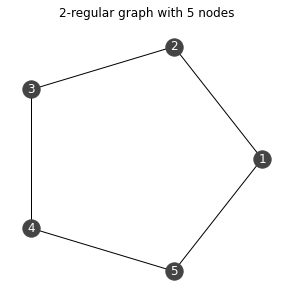

In [ ]:
#Ans.g) #Graph parameters to draw a 2-regular graph of node 5
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])

#Plotting parameters
basic_graph,ax = plt.subplots(1,1, figsize= (5,5))
nx.draw(G,
        ax=ax, 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        )
ax.set_title('2-regular graph with 5 nodes');

In [ ]:
#Ans.g) 
#Constructing the adjacency matrix of the above graph
A_g = np.matrix([[0 , 1 , 0 , 0 , 1],
               [1 , 0 , 1 , 0 , 0],
               [0 , 1 , 0 , 1 , 0],
               [0 , 0 , 1 , 0 , 1],
               [1 , 0 , 0 , 1 , 0]])

Sym(A_g) #To check if the matrix is symmetric

#To calculate the eigenvalue and find the minimum 
Ag_eig = np.round(np.linalg.eigvals(A_g))
print('Eigenvalues:',Ag_eig)
Ag_eig_min = np.min(Ag_eig)
print('Minimum eigenvalue:', Ag_eig_min)
print('It shows that the minimum eigenvalue of the regular graph is -2')

Matrix is symmetric
Eigenvalues: [-2.  1.  2. -2.  1.]
Minimum eigenvalue: -2.0
It shows that the minimum eigenvalue of the regular graph is -2


**h)** Show that the following graph, called the Petersen Graph, is $3$-regular by finding its eigenvalues. 

<img src="https://www.researchgate.net/profile/Paul_Wenger/publication/45714891/figure/fig1/AS:669480808091681@1536628071715/The-Petersen-graph.png" width=20%>


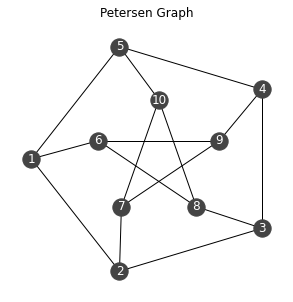

In [ ]:
#Ans.h) Petersen Graph
#Graph parameters to draw Petersen Graph
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
G.add_edges_from([(1,2),(1,5),(1,6),(2,3),(2,7),(3,4),(3,8),(4,5),
                  (4,9),(5,10),(6,8),(6,9),(7,9),(7,10),(8,10)])

#Plotting parameters
basic_graph,ax = plt.subplots(1,1, figsize= (5,5))
seq = [[10,6,7,8,9],[1,2,3,4,5]]
nx.draw(G,
        ax=ax, 
        pos=nx.shell_layout(G,seq),
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        )
ax.set_title('Petersen Graph');

In [ ]:
#Ans.h) 
#Representing the adjacency matrix for Petersen Graph
A_h = np.matrix([[0,1,0,0,1,1,0,0,0,0],
                [1,0,1,0,0,0,1,0,0,0],
                [0,1,0,1,0,0,0,1,0,0],
                [0,0,1,0,1,0,0,0,1,0],
                [1,0,0,1,0,0,0,0,0,1],
                [1,0,0,0,0,0,0,1,1,0],
                [0,1,0,0,0,0,0,0,1,1],
                [0,0,1,0,0,1,0,0,0,1],
                [0,0,0,1,0,1,1,0,0,0],
                [0,0,0,0,1,0,1,1,0,0]])

#To find the eigenvalues and the maximum of them
Ah_eig = np.round(np.linalg.eigvals(A_h))
print('Eigenvalues:',Ah_eig)
Ah_eig_max = np.max(Ah_eig)
print('Maximum eigenvalue:', Ah_eig_max)
print('As maximum eigenvalue is 3, thus Petersen Graph is 3-regular graph')

Eigenvalues: [-2.  1.  3. -2. -2.  1. -2.  1.  1.  1.]
Maximum eigenvalue: 3.0
As maximum eigenvalue is 3, thus Petersen Graph is 3-regular graph


**i)**
Show that if both  n≥k+1  and  nk  is even, then there exists a  k -regular graph of size  n .

**Ans.i)**
As $nk$ is even, and if $n$ depends on $k$, we have following cases:
1. $n$ = 0 or $k$ = 0
2. if $k$ is even then $n$ is even
3. if $k$ is odd then $n$ is even or odd

Considering the above options, we have the following cases-

**i)**
If $n = 0$ 

Then a graph doesn't exit. Also, it means that $k$ will be negative.This is not possible.  

If $k = 0$ 

Then $n \geq 1$, and the graph will have nodes without any neighbors. This type of graphs are called $0$-regular graphs. Thus, a $k$-regular graph of size $n$ exists. 

**ii)**
If $k$ is even and $k \geq 2$

Let's assume that $G_{n}(k)$ is a connected $k$-regular graph with a vertex set of $\{1,2,3,...,n\}$, for some $n \geq k+1 $.

Now, by using the property that if minimum degree of a vertex in a graph $X$ is $\delta \geq 2$, then there exists a path in $G$ containing $\delta$ edges. 

Let's consider, path $P$ to be a path in $G_{n}(k)$ containing $k$ edges. As $k$ is even, there will be $\frac{k}{2}$ vertex disjoint edges, $e_i = (u_i,v_i), 1\leq i \leq \frac{k}{2}$ in the path $P$.

Thus, the set, $\bigcup_{1\leq i \leq \frac{k}{2}} \left\{ u_i,v_i \right\}\;$ has k distict verices. 

By removing the edges, $e_i$, $1\leq i\leq \frac{k}{2}$ and adding $k$ new edges, the new set becomes-

$$\bigcup_{i=1}^{\frac{k}{2}}\left\{(n+1,u_i)\right\} \bigcup \left\{(n+1,v_i)\right\} $$

The resulting graph is a connected $k$-regular graph with vertices $\{1,2,...,n+1\}$ and is denoted as $G_{n+1}(k)$ graph.

**iii)**
If $k$ is odd, 

And if $k = 1$, then, $n \geq 2$ and has to be even. We can denote it as-

$n = 2z,$ where $z$ is natural number.

As number of nodes are always even, they can be distributed in two disjoint sets and each node can be connected one element of set A and to exactly one element of set B. 

For $k \geq 3$

Let's assume that $G_{n}(k)$ is a connected $k$-regular graph with a vertex set of $\{1,2,3,...,n\}$, for some even $n \geq k+1 $. 
The resulting graph is a connected $k$-regular graph with vertices $\{1,2,...,n+1\}$ and is denoted as $G_{n+1}(k)$ graph.

Now, by using the property that if minimum degree of a vertex in a graph $X$ is $\delta \geq 2$, then there exists a path in $G$ containing $\delta$ edges. 

Let's consider, path $Q_{n}(k) = (q_1,q_2,...,q_{k+1})$ to be a path in $G_{n}(k)$ containing $k$ edges as $\{(q_j,q_{j+1})\}_{1\leq j \leq k}$.

By removing $k-1$ edges, $\{(q_j,q_{j+1})\}_{1\leq j \leq k-1}$ and adding the following edges-

1. For $1\leq j \leq k-1, j $ odd, add the edges $\{(n+1, q_j),(n+1, q_{j+1})\}$

2. For $1\leq j \leq k-1, j $ even, add the edges $\{(n+2, q_j),(n+2, q_{j+1})\}$

3. And add the edge $(n+1, n+2)$

Since k is odd, the total number of edges added to $1$ is $k-1$ and thus, there are $k-1$ edges with $n+1$ as the end vertex after $1$. Similarly, after step $2\;$ there are $k-1$ edges with $n+2$ as the end vertex and the resulting graph, is a connected $k$-regular graph with vertex set $\{1,2,...,n+1,n+2\}$ and denoted as $G_{n+2}(k)$.

Thus, from the above cases we can state that if $nk$  is even and  $n≥k+1$, then there exists a  $k$-regular graph of size  $n$.

**Reference:** https://arxiv.org/abs/1801.08345, https://www.math.kit.edu/iag6/lehre/graphtheo2013w/media/how_to_write_a_proof.pdf
